<a href="https://colab.research.google.com/github/lidkalee/PyconPL2025_Polars/blob/main/Dive_into_Polars_PyConPl2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dive into Polars – an efficient DataFrame library for data manipulation and analysis with scientific applications**

## PyCon PL 2025
### Igor Zubrycki & Lidia Lipińska-Zubrycka


**NOTE**: This notebook works best with Google Colab. Before starting, please make sure to create a copy of this document: go to "File" > "Save a copy in Drive".




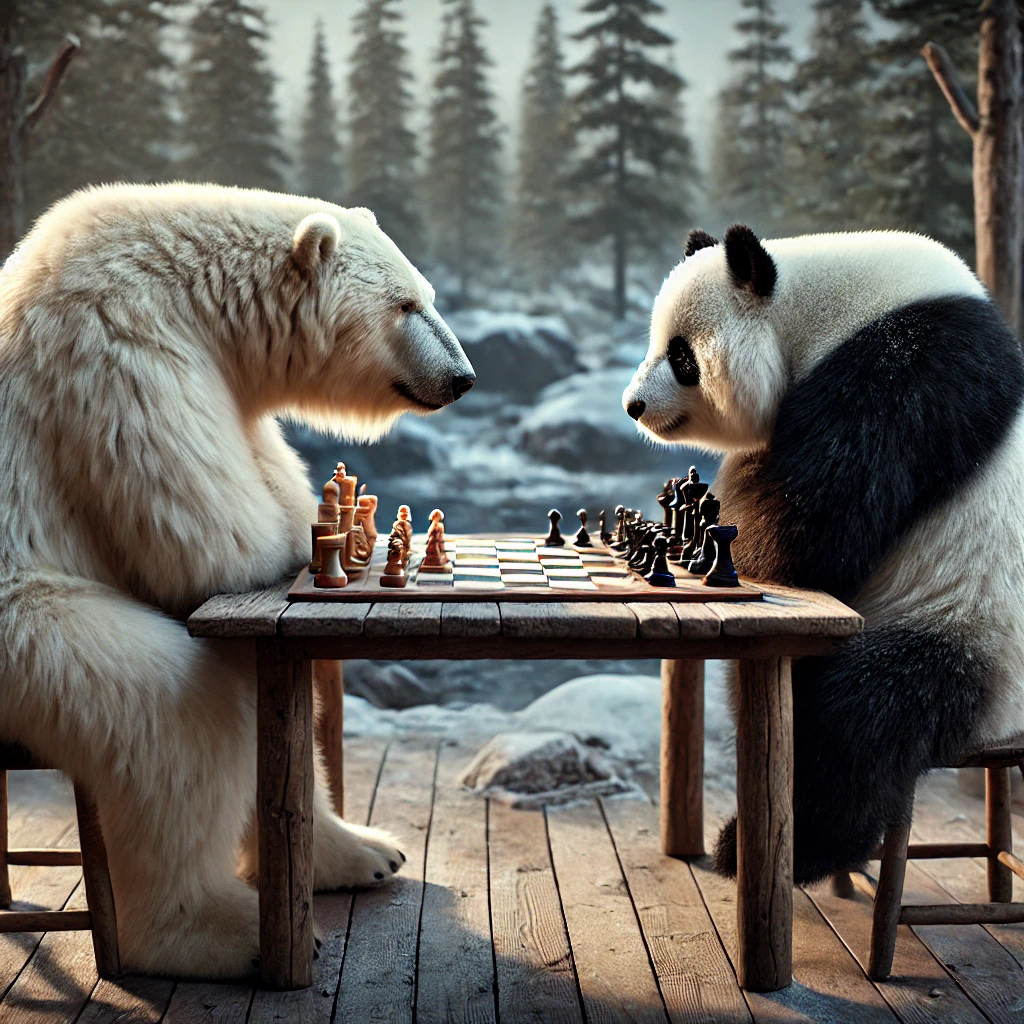

# Part 1: Introduction to the Polars Library

[**Polars**](https://docs.pola.rs/) is an open-source data analysis library designed with high performance and flexibility in mind. Built on the Rust programming language and the Apache Arrow specification, Polars enables columnar data processing with optimizations that leverage modern CPU architectures. It is especially useful when working with large datasets or when fast and efficient computation is required.

### Compared its predecesor Pandas, Polars offers:

* Exceptional performance: Polars is one of the fastests dataframe libraries: https://pola.rs/posts/benchmarks/ https://duckdblabs.github.io/db-benchmark/ (comparable to "bigger brothers" like Spark but with less setup and 100x times more performant on larger dataframes then Pandas)

* Support for large datasets: Polars handles both in-memory and streaming data processing, enabling efficient work with datasets that exceed RAM capacity.

* Expressibility and readability: Polars allows for a bit different but expressible and readable dataframe operations, while still allowing an export/ interchange to numpy or pandas formats


### When to Use Polars
Polars basically works with Polars is an excellent choice in the following scenarios:

* You work with large datasets that exceed RAM capacity.

* You need maximum performance and want to overcome Pandas limitations.

* You benefit from advanced query optimization techniques to accelerate processing.

* You operate in performance-critical environments, such as real-time applications.

### Advantages of the Rust Architecture
**Polars** is written in Rust, ensuring both high performance and memory safety. Rust prevents common memory management issues while providing features that maximize hardware efficiency.



## Data Structures in the Polars Library
Polars provides three main data structures:

* Series – Represents a single column of data with a uniform type (e.g., integers, strings, floats).

* DataFrame – A two-dimensional tabular data structure composed of rows and columns, similar to a table in a relational database.

* LazyFrame – A lazily evaluated version of a DataFrame. Operations on a LazyFrame are not executed immediately but are instead optimized and executed only when needed.

**LazyFrame** is especially usefull when working with large datasets, as Polars can automatically optimize query execution to reduce memory usage and improve performance.

The Polars library includes many built-in functions  [see the examples](https://docs.pola.rs/api/python/stable/reference/dataframe/index.html).

In [ ]:
## Installing the Polars Library (if not already installed, google colab has it but slightly older version)
#!pip install -U polars

In [ ]:
# Import libraries

import polars as pl
from datetime import date

## Data Structure: *Series* in the Polars Library

In [ ]:
## Creating a Sample Series Object
weights = pl.Series("Weight", [50, 60, 100, 120, 100, 90, 89, 88])

In [ ]:
weights.plot.line()

In [ ]:
## Inspect the weights variable.

## Your code here:


In [ ]:
## We can get a single number out of Series in Polars with multitude of methods max(), min(), sum() ... (https://docs.pola.rs/api/python/stable/reference/series/computation.html)

## What was the largest weight?



In [ ]:
## What is the median weight?


In [ ]:
## The output does not need to be a single number:

weights.cum_max().plot.line() # what does cum_max do? (cumulative max)

# nice to explore
# weights.diff().plot.line()
weights.rolling_mean(3).plot.line()

In [ ]:
## How to sort the data? – Try doing it in descending order as well.

weights.sort()

## what does bottom_k do? top_k

#weights.bottom_k(5)

In [ ]:
# you can slice the series using a list-like slicing
weights[3:10]

#or select particulars by gather
#weights.gather([3,4,2,4])

## Data Frames
Note: The following data is not real. It has been generated for training purposes.


In [ ]:
# Data as a dictionary

data = {
    "Patient ID": [1, 2, 3, 4, 5],
    "Name": ["Anna", "Bartek", "Cezary", None, "Ewa"],
    "Age": [28, 34, 45, 52, None],
    "Gender": ["Female", "Male", "Male", "Female", "Female"],
    "Blood Pressure": ["120/80", "130/85", "140/90", None, "125/80"],
    "Cholesterol Level": [195.5, 220.1, None, 230.2, 210.3],
    "Visit Date": [
        date(2023, 8, 15),
        date(2023, 8, 16),
        None,
        date(2023, 8, 18),
        date(2023, 8, 19),
    ],
    "Smoker": [False, True, True, False, False],
    "Weight (kg)": [55, 78, 90, None, 64],
    "Height (cm)": [165, 180, 175, 160, None],
}

# Creating a DataFrame with Polars
medical_df = pl.DataFrame(data)



In [ ]:
# Display medical_df DataFrame
medical_df

In [ ]:
## Examine the created DataFrame using the methods: head() -- will show you the top n rows, tail() -- will show you bottom rows
# describe() -- will provide various descriptive statistics.

## If you encounter any issues, refer to the documentation: https://docs.pola.rs/api/python/stable/reference/dataframe/index.html



### What does ***schema*** do in Polars?
In Polars, schema is a property that returns the exact structure of a DataFrame — the column names along with their corresponding data types. It is useful for quickly understanding the layout of a DataFrame, especially when working with large datasets where column types may vary significantly.



In [ ]:
medical_df.schema

### Subset of data frame

In [ ]:
medical_df.select("Gender")

medical_df.get_column("Gender")

# do these two return the same? What type is the column of polars data frame?

In [ ]:
# Subset of data using specific column names

df_selected = medical_df.select(['Patient ID', 'Gender'])

In [ ]:
## Print/ display the df_selected object



## Data Filtering

Filtering is a key operation in data analysis, allowing you to select only those rows that meet specific criteria. In the Polars library, the `.filter()`method is used for filtering DataFrame objects. Combined with the `pl.col()`  function, it enables precise referencing of the column you want to filter on.



`.filter()` – this method applies the given condition to all rows in the DataFrame and returns a new DataFrame containing only those rows that satisfy the criterion.

In [ ]:
## Example – filtering data by age
medical_df.filter( pl.col('Age') >= 30)

### Filtering data with multiple parameters

In [ ]:
## Please note the syntax, which is quite different from that in Pandas

medical_df.filter( pl.col('Age') >= 30, pl.col('Smoker') == True)

## Adding and removing columns


### Adding Columns
To add a new column based on existing ones, we use the `.with_columns()` method. This method accepts expressions (`Expr`) that define the new columns.

In [ ]:
## Example: Adding a new column with height in feet

#1 foot = 1 cm / 30.48

medical_df.with_columns(
    ( pl.col("Height (cm)")/30.48).round(2).alias("Height in feet")
    )

In [ ]:
medical_df # the column is not there! you need to assign name to it medical_df = ... with_columns...



In [ ]:
## Task: Please add a new column containing the BMI value


### Removing columns

In [ ]:
medical_df.drop('Gender')

### Sorting

In [ ]:
 ## Sorting different data types – from the smallest to the largest value (from zero to hero)

 medical_df.sort('Visit Date')

In [ ]:
## Sorting from the largest value to the smallest:


### Grouping and Aggregating Data
Filter first, then aggregate!

In [ ]:
medical_df.filter( pl.col('Age') >30 ).get_column('Cholesterol Level').max()

In [ ]:
## Grouping data and calculating various parameters

In [ ]:
## Grouping by gender

## What is the output, and why?

medical_df.group_by('Gender')

#### Why don’t we see the result of grouping immediately?
* In the Polars library, grouping is done using the `group_by()` method, similar to Pandas. However, just like in Pandas, `group_by()` on its own does not display results — an aggregation function must be applied.

* The `group_by()` method in Polars returns a grouping object (`LazyGroupBy` or `GroupBy`), which needs to be aggregated to produce a result.

In [ ]:
# lets assign a name to this group by object

gender_groups = medical_df.group_by('Gender')

In [ ]:
## Grouping and calculating the average weight

gender_groups.agg([
    pl.col("Weight (kg)").mean().alias("Average Weight (kg)")
])

In [ ]:
#### Multiple aggregation

gender_groups.agg([
    pl.col("Weight (kg)").mean().alias("Average Weight (kg)"),
    pl.col("Cholesterol Level").mean().alias("Average Cholesterol Level")
])

In [ ]:
## Task: Check if smokers have a higher average cholesterol level.



#### Dealing with missing values

In [ ]:
## How many missing values are there in each column?
medical_df.null_count()

In [ ]:
# what is select doing here?
medical_df.select( pl.col('Cholesterol Level').is_null().alias("missing cholesterol values"))

In [ ]:
## Show the subset of the DataFrame containing missing values in the "Cholesterol Level" column

medical_df.filter( pl.col('Cholesterol Level').is_null())

In [ ]:
### We are only interested in the rows with values in the "Cholesterol Level" column.


In [ ]:
medical_df.filter( pl.col('Cholesterol Level').is_not_null())

In [ ]:
### Replace Null values with another value

medical_df.with_columns( pl.col('Cholesterol Level').fill_null(pl.col('Cholesterol Level').mean())) ## Filling missing values with average from all the people

In [ ]:
medical_df.with_columns( pl.col('Cholesterol Level').fill_null(strategy = 'forward'))

In [ ]:
medical_df.with_columns( pl.col('Cholesterol Level').fill_null(strategy = 'backward'))
## This is still not an ideal solution for patient data.

In [ ]:
medical_df.with_columns( pl.col('Cholesterol Level').interpolate())

### Saving to a file

In [ ]:

medical_df.write_csv('medical_df.csv')

In [ ]:
##### Reading the saved CSV file

medical_df_2 = pl.read_csv('medical_df.csv')

In [ ]:
#### For larger datasets use Parquet not csv, explained below!

# Part 2: Polars in Biomedical Engineering Data Analysis



> This section was part of the workshop "[Fundamentals of Pandas and Polars in scientific applications](https://github.com/AdoHaha/PyConPL24_Pandas_Polars)" conducted at PyCon PL 2024 in Gliwice. The data comes from the MyHand research project, which focuses on developing devices for hand rehabilitation in post-stroke patients (project leader: Igor Zubrycki, Lodz University of Technology).


In this part, we will use the capabilities of the Polars library to analyze data from a real experiment conducted with a pneumatic robot.

The figure below shows a prototype of the rehabilitation device “Balonikotron” and the pneumatic robot, which allows precise control of pressure in pneumatic cushions used in therapy.


![Balonikotron](https://raw.githubusercontent.com/AdoHaha/PyConPL24_Pandas_Polars/master/PXL_20231030_172454814.MP.jpg	)


<iframe width="560" height="315" src="https://www.youtube.com/embed/def-jX-fPmc?si=B2MJzkeHuMGhj2-d" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>





# Data
The data is stored in multiple tab-separated CSV files.

### Data Description

* time – time [s]
* weight – weight
* gas_flow – airflow into the balloon
* pressure – pressure in the balloon
* laser – distance measured by the laser – used to calculate the device’s angle (tilt)
* angle – angle/tilt of the rehabilitation device
*angle_vel – parameter indicating how quickly the angle changes over time

In [ ]:
# Please clone the repository

!git clone https://github.com/lidkalee/PyconPL2025_Polars

In [ ]:
# Installation of Plotly library - for interactive data visualizations

!pip install -U plotly

In [ ]:
# Importing the library – we already did this earlier
import polars as pl

# Loading a single CSV file
df_example = pl.read_csv("PyconPL2025_Polars/raw_data_robot/Bt_0.csv", separator="\t")

# Preview of the first rows
df_example.head(200)

### Preparing to use multiple files simultaneously with the` glob` module
The `glob` module is used to search for file paths matching a specified pattern. At this stage, we are not loading the files into Python; we are only preparing a list of files in the directory below.

In [ ]:
import glob

## glob.glob() returns a list of files in the directory PyconPL2025_Polars/raw_data_robot/ that have the .csv extension
filepaths = glob.glob("PyconPL2025_Polars/raw_data_robot/*.csv")

## How many files do we have?


### Example plot for a single experimental dataset (a single dataset)

In [ ]:
##Example plot for a single dataset (the results of experiments are stored in separate CSV files)
## We check how the device’s angle (tilt) changes over time.
## In Google Colab, there are limitations when creating plots directly with Polars (it is still quite a new and developing library), therefore we use the Plotly tool instead.


import plotly.express as px
px.line(df_example, x="time", y=["angle"])



**Data Exploration Task**

Please review the data and try to explain why the device’s tilt angle changes over time in the way it does. Keep in mind that the device’s tilt (angle) changes depending on the degree of balloon inflation — the pressure inside the balloon changes, and we can also control the airflow into the balloon (gas flow). Additionally, the force (weight) that the patient’s hand would need to exert to counterbalance the tilt of the device also changes.

Note: Weight should be a positive value, so in one of the next steps we will introduce the appropriate correction.

In [ ]:
# Your code:


### Loading data from individual experiments into a larger DataFrame
The code below loads data from the CSV files located in the PyConPL24_Pandas_Polars/raw_data_robot folder. This process uses lazy loading from the Polars library, which allows efficient handling of large datasets. Each file is tagged with an additional column indicating its file path, and all files are then merged into one large DataFrame.


In [ ]:
# First, we create a plan—or rather, a list of plans—a step-by-step list of actions that will be executed only when we choose to.

# We prepare all the files from the specified directory and “scan” them (scan_csv).
# At this stage, we prepare the files for reading, but nothing actually happens. scan_csv initiates the use of a LazyFrame.

import glob

queries = []
for filepath in glob.glob("PyconPL2025_Polars/raw_data_robot/*.csv"): # Pobieramy wszystkie pliki z folderu
    df = pl.scan_csv(filepath, separator="\t", null_values="nan") # Używamy LazyFrame, aby stworzyć plan wczytywania danych
    df = df.with_columns(pl.lit(str(filepath)).alias("file_path")) # Dodajemy kolumnę z informacją o ścieżce pliku
    queries.append(df) # Dodajemy każdy plan (lazyframe) do listy
# let's load all these files into a large DataFrame

import glob

queries = []
for filepath in glob.glob("PyconPL2025_Polars/raw_data_robot/*.csv"): # we take all the files in the folder
    df = pl.scan_csv(filepath, separator="\t",null_values="nan") # we will use "LazyFrame" to create a plan for loading the data
    df = df.with_columns(pl.lit(str(filepath)).alias("file_path")) # for each file we add a column with the file path
    queries.append(df) # we add each such plan/ lazyframe to a list

plan = pl.concat(queries) # we concatenate all the plans into one
multiple_experiments = plan.collect() # we turn the plan into reality and load the data

plan = pl.concat(queries) # Łączymy wszystkie plany w jeden

# Up to this point, the program has not executed anything — it has only planned the work. Only in the next step does something actually happen.
# Polars makes very efficient use of computational power and can perform many operations in parallel.

multiple_experiments = plan.collect() # We execute the plan and load the data



In [ ]:
# How can you describe the data and obtain basic statistical parameters for the entire table? (Hint: The command is similar to Pandas)



#### The code below is used to visualize data with Plotly Express, drawing a line chart of the "weight" column as a function of time from the CSV files — we plot data from multiple files at once!

In [ ]:
# let's plot the data
px.scatter(multiple_experiments, x="time",y=["weight"], color="file_path")
#multiple_experiments.plot.scatter(x="time",y=["weight"], by="file_path") #other plots can be made in offline version of polars



In [ ]:
# Task
# Create an analogous plot for the "angle" column


In [ ]:
# We can visualize a single experiment by using filtering to select the data

single_experiment = multiple_experiments.filter(pl.col("file_path") == "PyconPL2025_Polars/raw_data_robot/Bt_0.csv")

px.scatter(single_experiment,x="time",y=["weight"])

In [ ]:
# The weight is negative, let’s fix this.

multiple_experiments = multiple_experiments.with_columns((multiple_experiments["weight"]*-1).alias("weight2"))
px.scatter(multiple_experiments,x="time",y=["weight2"], color="file_path")

In [ ]:
# Let’s also visualize a downsampled version of the data (selecting every 100th value).

subsampled = multiple_experiments.gather_every(100)

px.scatter(subsampled, x="time",y=["weight2"], color="file_path")

In [ ]:
# We can also visualize only selected experiments — let’s choose the first six

single_decimal_regex = "PyconPL2025_Polars/raw_data_robot/Bt_[0-5].csv"
first_five = multiple_experiments.filter(pl.col("file_path").str.contains(single_decimal_regex))

px.scatter(first_five,x="time",y=["weight2"], color="file_path")

### Saving results to a file – comparison of CSV and Parquet formats

Saving results to a file:

* `write_parquet`:
Saves the data in Parquet format, which is a binary format optimized for efficient storage and reading of large datasets.
It is more efficient than CSV in terms of file size and read/write speed.

* `write_csv`:
Saves the data in CSV (Comma-Separated Values) format, which is more human-readable and widely used for data exchange between different systems. It does not contain the schema and the files can be much larger





In [ ]:
# Save the output files in both CSV and Parquet formats.

multiple_experiments.write_parquet("multiple_experiments_a.parquet")

multiple_experiments.write_csv("multiple_experiments_a.csv")



In [ ]:
# Compare these files, are they the same size?



# This concludes the core part of today’s session. If you still have time, please proceed to the exercise and the following sections.

### Task
The values given in the tables (e.g., pressure) are not in SI units. Please create new columns:
* **gas_flow_si**, which requires multiplication by 5/6000000
* **pressure_si**, which requires multiplication by 1000,
* **force_si**, which requires reversing the sign

In [ ]:
# Please use the hint below and add the columns for all experiments at once


multiple_experiments = multiple_experiments.with_columns( ...)

### To understand the balloon’s behavior, we need to calculate its volume.

For this, we use the gas flow rate. The volume is computed as the cumulative sum of the gas flow over time. Mathematically, this can be expressed as:

$$
Volume = \sum_{t=0}^{T_{end}} ({gas\_flow\_{si}} * \Delta t)
$$

Where:

* $Volume$ is the total volume of gas,

* $T_{end}$ is the final time step,

* $gas_flow_{si}$ is the gas flow at each time step $t$,
* $\Delta t$ is the time interval between consecutive steps.

# Let’s start by calculating this for a single experiment:
We need to:

1. filter the data for one experiment,

2. compute the time difference,

3. compute the volume increment for each time step,

4. sum these values.

In [ ]:
single_experiment = multiple_experiments.filter(pl.col("file_path") == "PyconPL2025_Polars/raw_data_robot/Bt_2.csv")

px.scatter(single_experiment, x="time",y=["gas_flow"]) # We can see that the gas flow fluctuates slightly and takes some time to start.

Polars offers many built-in functions, and the most “Pandas-like” way to solve this problem is to create a few new series: the time difference (time delta), then the volume increment (volume delta), and finally sum them up.

In [ ]:
time_deltas = single_experiment["time"].diff() # We calculate the time differences (time deltas) between consecutive measurements.

time_deltas.plot.hist() # The time differences are fairly stable, but not perfect.

In [ ]:
volume_deltas = single_experiment["gas_flow"] * time_deltas # Please replace the column with 'gas_flow_si'.
px.line(volume_deltas.to_frame()) # We can see that the flow fluctuates slightly and needs some time to stabilize.
#volume_deltas.plot.plot() # The flow is surprisingly stable.

In [ ]:
# Now we use the cumulative sum to calculate the total of the volume increments (volume deltas) up to a given point.
volumes = volume_deltas.cum_sum()

# We add the calculated volume to the original data.
single_experiment = single_experiment.with_columns(volumes.alias("volume"))

px.line(single_experiment, x="time", y=["volume"])
#single_experiment.plot(x="time", y=["volume"])  # We can see that the volume increases over time in an almost linear way (after the initial phase).

In [ ]:
# We can also do this in a more “Polars-like” way, using expressions — this is not available in Pandas.

# We create an expression that calculates the cumulative sum.
calculate_delta_volumes = (pl.col("time").diff() * pl.col("gas_flow")).cum_sum().alias("volume")

single_experiment = single_experiment.with_columns(calculate_delta_volumes)
px.line(single_experiment, x="time", y=["volume"])
#single_experiment.plot(x="time", y=["volume"])  # We can see that the volume increases over time in an almost linear way (after the initial phase).

In [ ]:
# We calculate the volumes for all experiments.

multiple_experiments = multiple_experiments.with_columns(calculate_delta_volumes.over("file_path"))


#### Optional Task


In [ ]:
## Visualize the volumes for all experiments (using Plotly).


# BONUS A bit of machine learning:
* To conclude this very quick introduction to Polars, let’s take a look at machine learning (don’t worry – we are only interested in regression).

* We want to use pressure, balloon volume, and angle to estimate force.

* Let’s start by creating training and test datasets based on the experimental results.

* For an introduction to the concepts of training and test sets, please refer to the literature.

In [ ]:
# Installing the Scikit-learn library (if needed)
!pip install -U scikit-learn

In [ ]:
import sklearn
import sklearn.model_selection

all_experiement_paths = multiple_experiments["file_path"].unique().to_list() # we will use the names to divide


train, test = sklearn.model_selection.train_test_split(all_experiement_paths,test_size=0.2) #s plit the data into train and test

train_dataset = multiple_experiments.filter(pl.col("file_path").is_in(train))

test_dataset = multiple_experiments.filter(pl.col("file_path").is_in(test))

In [ ]:
X_train = train_dataset.select(["volume","angle","pressure"])
Y_train = train_dataset.select(["weight2"]) # use the SI column !

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)

### Did an error occur? Well, we first need to remove the NaN values.

In [ ]:
train_dataset.head()

In [ ]:
# lets remove rows that have nans

nan_in_any_column = pl.all_horizontal(pl.col(pl.Float64).is_not_nan()) # general expression to remove nans

train_dataset = train_dataset.filter(
 nan_in_any_column
    )

X_train = train_dataset.select(["volume","angle","pressure"])
Y_train = train_dataset.select(["weight2"])

test_dataset = test_dataset.filter(
 nan_in_any_column
    )

X_test = test_dataset.select(["volume","angle","pressure"])
Y_test = test_dataset.select(["weight2"])

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
## Let's look at X_train and Y_train



In [ ]:
# now we can predict the weight for the test data

Y_pred = reg.predict(X_test)
reg.score(X_test,Y_test)

In [ ]:
# Task: Find the worst-performing data point


In [ ]:
# Task: Visualize the original force and the predicted forces in the test data, perhaps for a single experiment?


In [ ]:
# Finally, we can check which experiment performed the worst — the one with the lowest score value.

def get_score(df):
    X = pl.DataFrame({"volume":df[0],"angle":df[1],"pressure":df[2]})
    Y = pl.DataFrame({"weight2":df[3]})

    return reg.score(X,Y)

test_dataset.group_by("file_path", maintain_order= True).agg(pl.map_groups(exprs=["volume","angle","pressure","weight2"],function = get_score).alias("score"))

## Thank you!
